In [236]:
import velocity_metrics.utils.constant as const 
import velocity_metrics.eulerian.eulerian_drifters as eulerian  
import datetime
import sys   
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import cartopy
import warnings 
warnings.filterwarnings("ignore") 
sys.path.append('/Odyssey/private/t22picar/2024_DC_WOC-ESA/')
from src import utils
from plot_rmse import plot_rmse_score_0m, plot_rmse_score_15m
import velocity_metrics.eulerian.eulerian_drifters as eulerian_drifters
import os
from plot_rmse import DictTable_color

dic_p = {'RMSD': {'vmin': 0.1, 'vmax': 0.4, 'cmap': 'YlGnBu_r'},
        'STD': {'vmin': 0.1, 'vmax': 0.4, 'cmap': 'YlGnBu'},
        'Correlation': {'vmin': 0.6, 'vmax':1, 'cmap': 'YlGnBu'},
        'Explained Variance (%)': {'vmin': 50, 'vmax': 85, 'cmap': 'YlGnBu'},
        'MSD Explained Variance (%)': {'vmin': 50, 'vmax': 85, 'cmap': 'YlGnBu'},
        'Quadratic Error (%)': {'vmin': 30, 'vmax': 65, 'cmap': 'YlGnBu_r'}
        }

dic_diff = {'RMSD': {'vmin': -0.02, 'vmax': 0.02, 'cmap': 'RdBu_r'},
        'STD': {'vmin': -0.1, 'vmax': -0., 'cmap': 'YlGnBu'},
        'Correlation': {'vmin': -0.10, 'vmax':0.10, 'cmap': 'RdBu'},
        'Explained Variance (%)': {'vmin': -20, 'vmax': 20, 'cmap':'RdBu'},
        'MSD Explained Variance (%)': {'vmin': -20, 'vmax': 20, 'cmap':'RdBu'},
        'Quadratic Error (%)': {'vmin': -10, 'vmax': 10, 'cmap': 'RdBu_r'}
        }
                
def compare_map(list_var,ref,to_eval,box=None,dic_diff=None):

        proj = cartopy.crs.PlateCarree()


        ind = 0

        print(f'Diagnostic {list_var}')
        #print(listdir)
        dic_p = dic_diff
        #ref = listdir[2]
        print(f"ref : {os.path.splitext(os.path.basename(ref))[0]}")
        print(f"to eval : {os.path.splitext(os.path.basename(to_eval))[0]}")
        #print(f'{os.path.splitext(os.path.basename(ref))[0].split('_')[2:]} vs {os.path.splitext(os.path.basename(file))[0].split('_')[2:]}')

        title_ref = os.path.splitext(os.path.basename(ref))[0]
        title_ref = title_ref.split('_')
        title_ref = '_'.join(title_ref[2:])

        title_eval = os.path.splitext(os.path.basename(to_eval))[0]
        title_eval = title_eval.split('_')
        title_eval = '_'.join(title_eval[2:])

        #for file in to_eval:
        bn =  os.path.dirname(to_eval)
        title = os.path.splitext(os.path.basename(to_eval))[0]
        title_list = title.split('_')
        title = '_'.join(title_list[2:])

        #fig = eulerian_drifters.plot_bin_diff(to_eval, ref, bn, var,
        #                                box= box, 
        #                                vmin=dic_p[var]['vmin'],
        #                                vmax=dic_p[var]['vmax'],
        #                                cmap=dic_p[var]['cmap'],
        #                                proj=proj)

        fig = plot_bin_diff(to_eval, ref, bn, list_var,
                                        box= box, 
                                        #vmin=dic_p[var]['vmin'],
                                        #vmax=dic_p[var]['vmax'],
                                        #cmap=dic_p[var]['cmap'],
                                        proj=proj)

        if title_eval=="unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet":
                title_eval="NOSC$_{duacs}$"
        if title_eval=="unet_uv_aoml_15m_10y_11d_bathy_sst_mae_duacs_RonanUnet":
                title_eval="NOSC$_{duacs-sst}$"
        if title_eval=="unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost_RonanUnet":
                title_eval="NOSC$_{neurost}$"
        if title_ref=="unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet":
                title_ref="NOSC$_{duacs}$"
        if title_ref=="unet_uv_aoml_15m_10y_11d_bathy_sst_mae_duacs_RonanUnet":
                title_ref="NOSC$_{duacs-sst}$"
        if title_ref=="unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost_RonanUnet":
                title_ref="NOSC$_{neurost}$"
        if title_ref=="duacs_15m_8th":
                title_ref="DUACS"
        if title_ref=="globcurrent_15m_4th":
                title_ref="GlobCurrent (daily)"
        if title_ref=="neurost_sst_ssh_15m_10th":
                title_ref="NeurOST"
        #fig.suptitle(f'{title_eval} vs {title_ref}', y=1) 
        
def init_cartopy(ax, box: Optional[list] = [-180, 180, -90, 90]):
    """
    Initialize cartopy map
    Args:
        ax (matplotlib axe)
        box: Domain (lon_min, lon_max, lat_min, lat_max), optional, default is
         global
    """
    import cartopy
    # projection = cartopy.crs.Mercator()
    ax.add_feature(cartopy.feature.LAND, zorder=2)
    ax.add_feature(cartopy.feature.COASTLINE, zorder=2)
    ax.add_feature(cartopy.feature.LAKES, alpha=0.5, zorder=2)
    ax.add_feature(cartopy.feature.RIVERS, zorder=2)
    ax.set_extent([box[0], box[1], box[2], box[3]])
    gl = ax.gridlines(draw_labels=["top",'right'], linestyle='--', linewidth=2,
                      alpha=0.2, color='gray')
    gl.xlabels_top = False
    gl.ylabels_left = True
    return gl

In [337]:
from typing import Tuple, Optional
import pickle
import numpy
#from velocity_metrics.eulerian.eulerian_drifters import init_cartopy
import matplotlib.ticker as mticker

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.50

def plot_bin_diff(ifile1: str, ifile2: str, output_dir: str, list_var,
                   box: Optional[list] = None,
                   vmin: Optional[float] = None, vmax: Optional[float] = None,
                   cmap: Optional[str] = 'seismic', proj = None):
    from matplotlib import pyplot
    from mpl_toolkits.axes_grid1 import ImageGrid

    with open(ifile1, 'rb') as f:
        dic1 = pickle.load(f)
    with open(ifile2, 'rb') as f:
        dic2 = pickle.load(f)
    n = 4
    if box is None:
        box = (numpy.min(dic1['lon']), numpy.max(dic1['lon']),
               numpy.min(dic1['lat']), numpy.max(dic1['lat']))
    #fig = pyplot.figure(figsize=(n*3, n))
    fig = pyplot.figure(figsize=(n*2*2, n*3))


    import cartopy
    proj = cartopy.crs.Robinson()
    
    if proj is not None:
        import cartopy

        from cartopy.mpl.geoaxes import GeoAxes
        from mpl_toolkits.axes_grid1 import AxesGrid

        axes_class = (GeoAxes, dict(projection=proj))

        ax = AxesGrid(fig, 111, axes_class=axes_class,
                      nrows_ncols=(3, 2), axes_pad=0.4,
                      cbar_location='bottom', cbar_mode='edge',
                      cbar_pad="5%", cbar_size='7%', label_mode='all')
    else:
        ax = ImageGrid(fig, 111, nrows_ncols=(3, 2), axes_pad=0.4,
                       cbar_location="right", cbar_mode="each",
                       cbar_size="7%", cbar_pad="5%")
        

    #for spine in ax.spines.values():
        #spine.set_zorder(11)  # zorder élevé pour que les bords soient au-dessus des autres éléments



    #print(ax.shape)
    fig.subplots_adjust(hspace=0.2, wspace=0.2)  # `hspace` contrôle l'espacement vertical, `wspace` 
    
    ind_var=0


    for var in list_var:

        ind_dir = 0
        
        for comp in ('Eastward', 'Northward', 'Norm'):

            ind = ind_dir*2 + ind_var
            #print(ind)

            vmin=dic_diff[var]['vmin']
            vmax=dic_diff[var]['vmax']
            #cmap=dic_p[var]['cmap']
            cmap = plt.cm.RdBu
            cmap.set_bad(color='gray')  # Définit la couleur des NaN en gris
            
            value = dic1[f'{comp} {var}'] - dic2[f'{comp} {var}']
            #print(value)
            
            proj = cartopy.crs.PlateCarree()
            
            if proj is not None:
                gl = init_cartopy(ax[ind], box)
                #if ind!=0:
                #    gl.ylocator = mticker.FixedLocator([])
                cmap.set_bad(color='gray')  # Définit la couleur des NaN en gris
                c = ax[ind].pcolor(dic1['lon'], dic1['lat'], value,
                                    vmin=vmin, vmax=vmax,
                                    cmap=cmap, transform=proj)

            
            else:
                c = ax[ind].pcolor(dic1['lon'], dic1['lat'], value,
                                vmin=vmin, vmax=vmax,
                                cmap=cmap)
                
            if ind_dir ==0: 
                if var =="MSD Explained Variance (%)":
                    var_bis="Explained Variance (%)"
                    ax[ind].set_title(f'{var_bis}',size=14,)
                else:
                    ax[ind].set_title(f'{var}',size=14,)

            if ind_dir ==2:

                    # Position et taille de l'axe de la barre de couleur
                cax = fig.add_axes([
                    0.163 + ind_var * 0.4,  # Position horizontale (ajuste selon la largeur de tes sous-graphiques)
                    0.11,              # Position verticale (en bas de la figure)
                    0.3,              # Largeur de l'axe (ajuste selon la largeur de tes colonnes)
                    0.02              # Hauteur de l'axe (longueur de la barre de couleur)
                ])

                #cb = ax.cbar_axes[ind].colorbar(c,orientation='horizontal')
                    # Ajoute une barre de couleur à cet axe
                fig.colorbar(c, cax=cax, orientation='horizontal')
                #cb = cax.colorbar(c,cax=cax,orientation='horizontal')

                #cb.set_label(var)
            else:
                cax = ax.cbar_axes[ind]
                cax.set_visible(False)

            if ind_var==0:
                ax[ind].set_ylabel(f'{comp}')
                #gl.ylocator = mticker.FixedLocator([])
                #ax[ind].set_ylabel(f'{comp}',size=20)
                #ax[ind].tick_params(labelleft=True)
                #ax[ind].set_ylabel(f'{comp}')
                #gl.top_labels = False
                gl.right_labels = False
                #gl.bottom_labels = True
                gl.left_labels = False
                ax[ind].yaxis.set_label_text(f'{comp}', size=20)
                
                ax[ind].text(
                -0.06,  # Position horizontale (en coordonnées relatives de la figure, hors de l'axe)
                0.5,    # Position verticale (centrée verticalement)
                f'{comp}',  # Texte de l'étiquette
                size=14,
                rotation=90,  # Rotation pour imiter une étiquette Y
                transform=ax[ind].transAxes,  # Utilise les coordonnées relatives de l'axe
                ha='center',  # Alignement horizontal
                va='center',  # Alignement vertical
                )
                
            ind_dir += 1
        ind_var += 1 



    #pyplot.savefig(os.path.join(output_dir, f'{var}.png'))
    return fig



In [338]:
listkey_comp = ( 
           'Eastward Correlation', 'Northward Correlation','Norm Correlation', 
           'Eastward Explained Variance (%)', 'Northward Explained Variance (%)','Norm Explained Variance (%)',
           'Number of Points')

listkey_comp = ('Eastward RMSD', 'Northward RMSD','Norm RMSD', 
           'Eastward Correlation', 'Northward Correlation','Norm Correlation', 
           'Eastward Explained Variance (%)', 'Northward Explained Variance (%)','Norm Explained Variance (%)',
           'Number of Points')


listkey_comp = ( 'Eastward RMSD', 'Northward RMSD','Norm RMSD', 
           'Eastward Correlation', 'Northward Correlation','Norm Correlation', 
           'Eastward MSD Explained Variance (%)', 'Northward MSD Explained Variance (%)','Norm MSD Explained Variance (%)',
           'Number of Points')



Diagnostic ['Correlation', 'MSD Explained Variance (%)']
ref : Eulerian_BINNED_globcurrent_15m_4th
to eval : Eulerian_BINNED_unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet
[[        nan         nan         nan ...         nan         nan
          nan]
 [ 0.13483489  0.27862507  0.05654217 ...  0.05200809  0.10328236
          nan]
 [ 0.04029704  0.0812299   0.00063245 ...  0.03949302  0.04910168
          nan]
 ...
 [-0.02625091 -0.26753102 -0.03940732 ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]]
[[        nan         nan         nan ...         nan         nan
          nan]
 [ 0.1235632   0.095009   -0.27526167 ...  0.11111251  0.06373761
          nan]
 [ 0.10187104  0.00870487  0.01800143 ...  0.02213973  0.04858429
          nan]
 ...
 [-0.01445954 -0.31223984  0.34583239 ...         nan         nan
          n

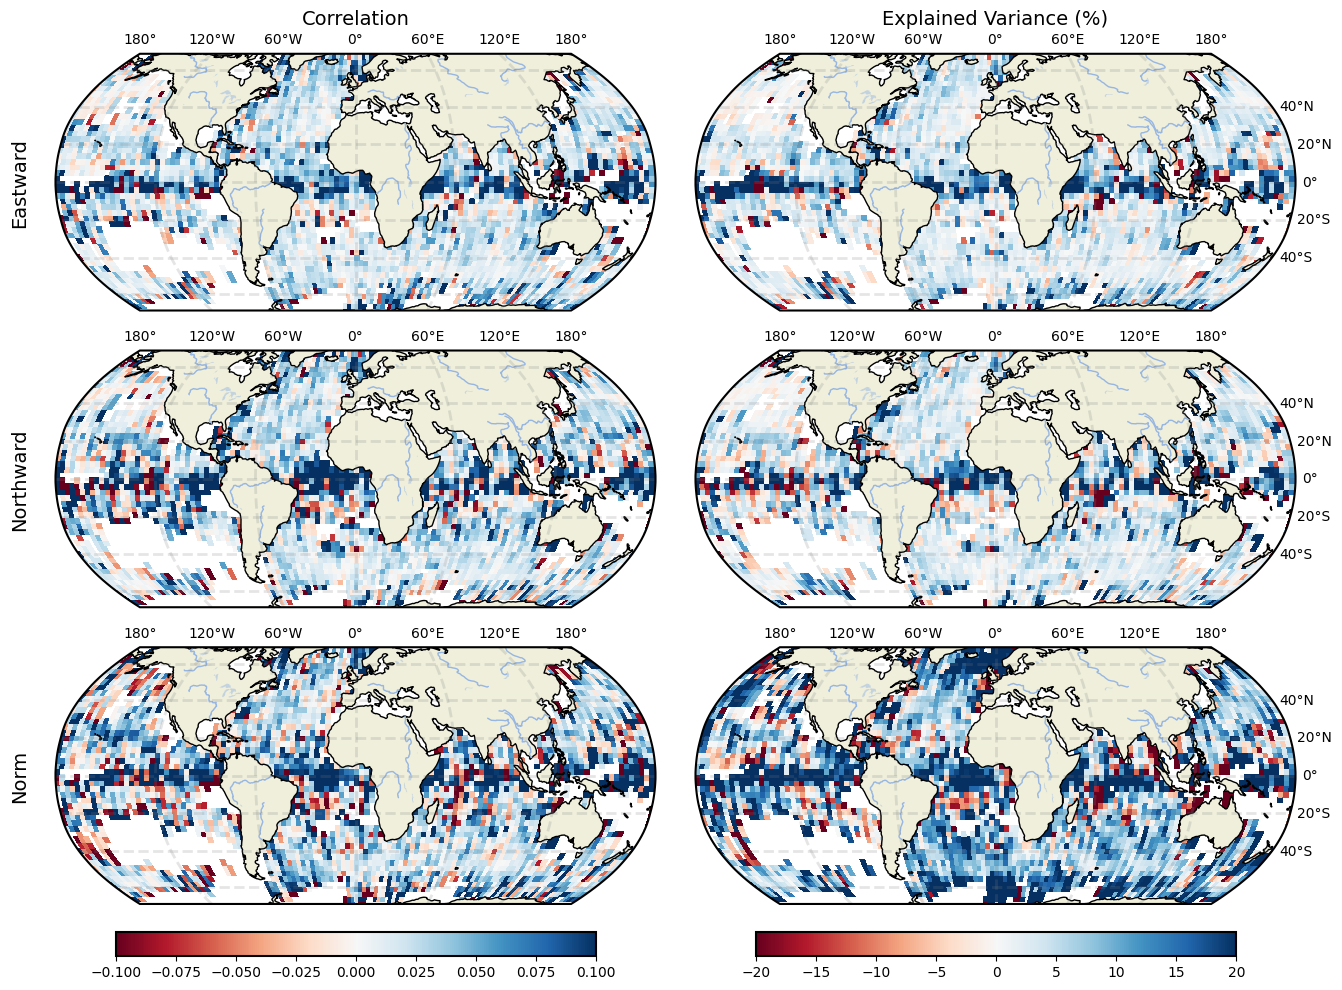

In [336]:
base_output="../../rec"
list_region=['Global']

depth = '15'
listvar = ('RMSD',  'Correlation', 'Explained Variance (%)', 'Quadratic Error (%)')

var = "Correlation"
list_var = ["Correlation","MSD Explained Variance (%)"]

for region in list_region:
     
     #ref = listdir[0]
     xp_name="globcurrent_15m_4th"
     ref = f"{base_output}/{xp_name}/metric/{region}/Eulerian_BINNED_{xp_name}.pyo"

     xp_name="unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet" 
     to_eval = f"{base_output}/{xp_name}/metric/{region}/Eulerian_BINNED_{xp_name}.pyo"

     compare_map(list_var,ref,to_eval,box=[-180, 180, -70, 70])
     
plt.savefig('/Odyssey/private/t22picar/plot_article/figures/nosc-duacs_vs_gc.png', dpi=300, bbox_inches='tight')

Diagnostic ['Correlation', 'MSD Explained Variance (%)']
ref : Eulerian_BINNED_globcurrent_15m_4th
to eval : Eulerian_BINNED_unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost_RonanUnet


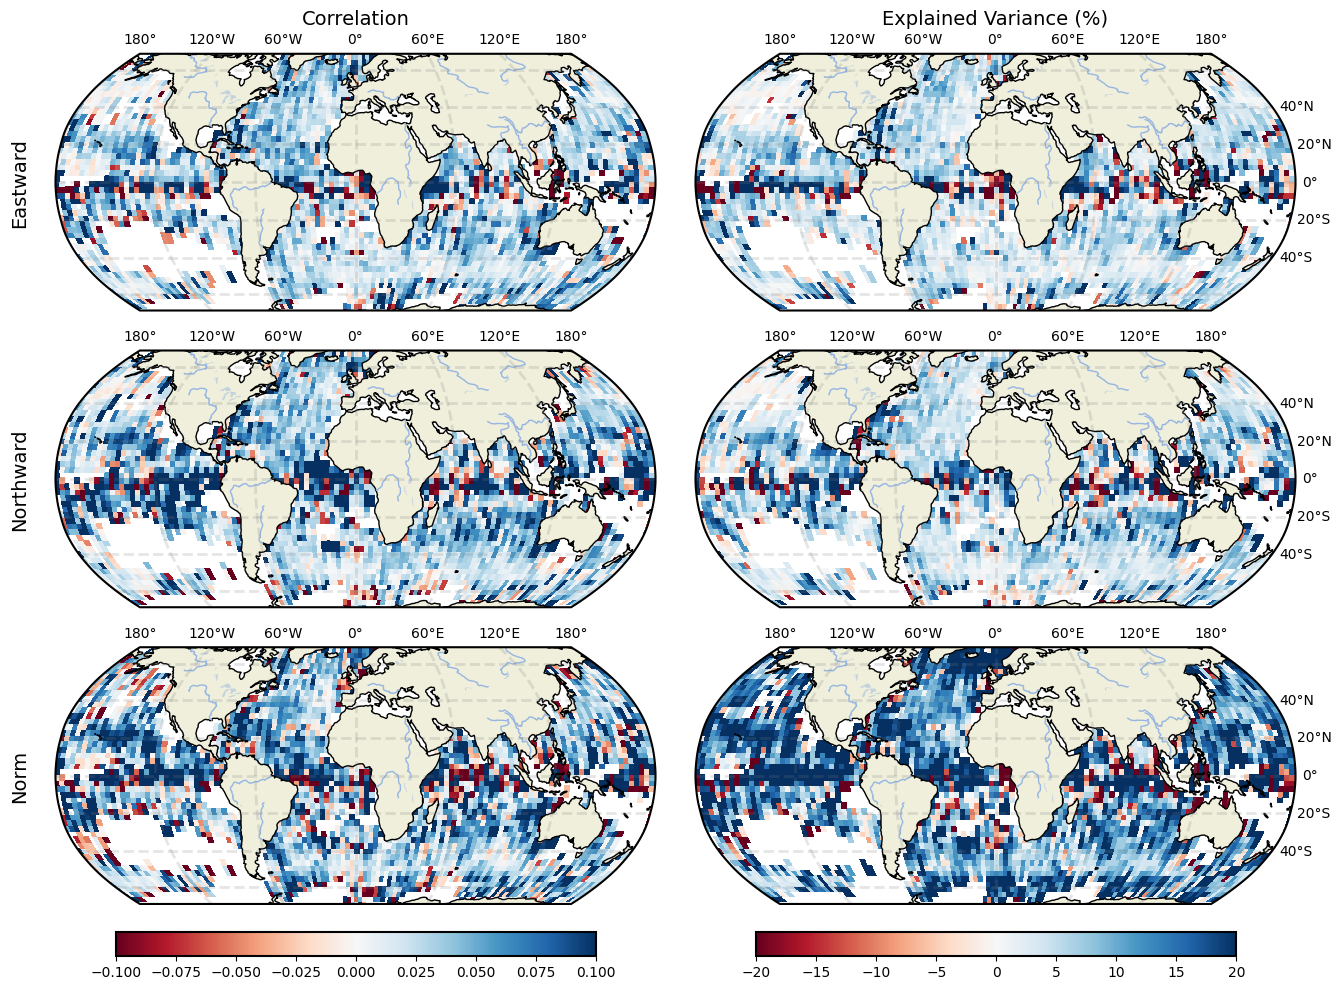

In [324]:
base_output="../../rec"
list_region=['Global']

depth = '15'
listvar = ('RMSD',  'Correlation', 'Explained Variance (%)', 'Quadratic Error (%)')

var = "Correlation"
list_var = ["Correlation","MSD Explained Variance (%)"]

for region in list_region:
     
     #ref = listdir[0]
     xp_name="globcurrent_15m_4th" #
     ref = f"{base_output}/{xp_name}/metric/{region}/Eulerian_BINNED_{xp_name}.pyo"

     xp_name="unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost_RonanUnet" 
     to_eval = f"{base_output}/{xp_name}/metric/{region}/Eulerian_BINNED_{xp_name}.pyo"

     compare_map(list_var,ref,to_eval,box=[-180, 180, -70, 70])
     
plt.savefig('/Odyssey/private/t22picar/plot_article/figures/nosc-neurost_vs_gc.png', dpi=300, bbox_inches='tight')

Diagnostic ['Correlation', 'MSD Explained Variance (%)']
ref : Eulerian_BINNED_neurost_sst_ssh_15m_10th
to eval : Eulerian_BINNED_unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost_RonanUnet


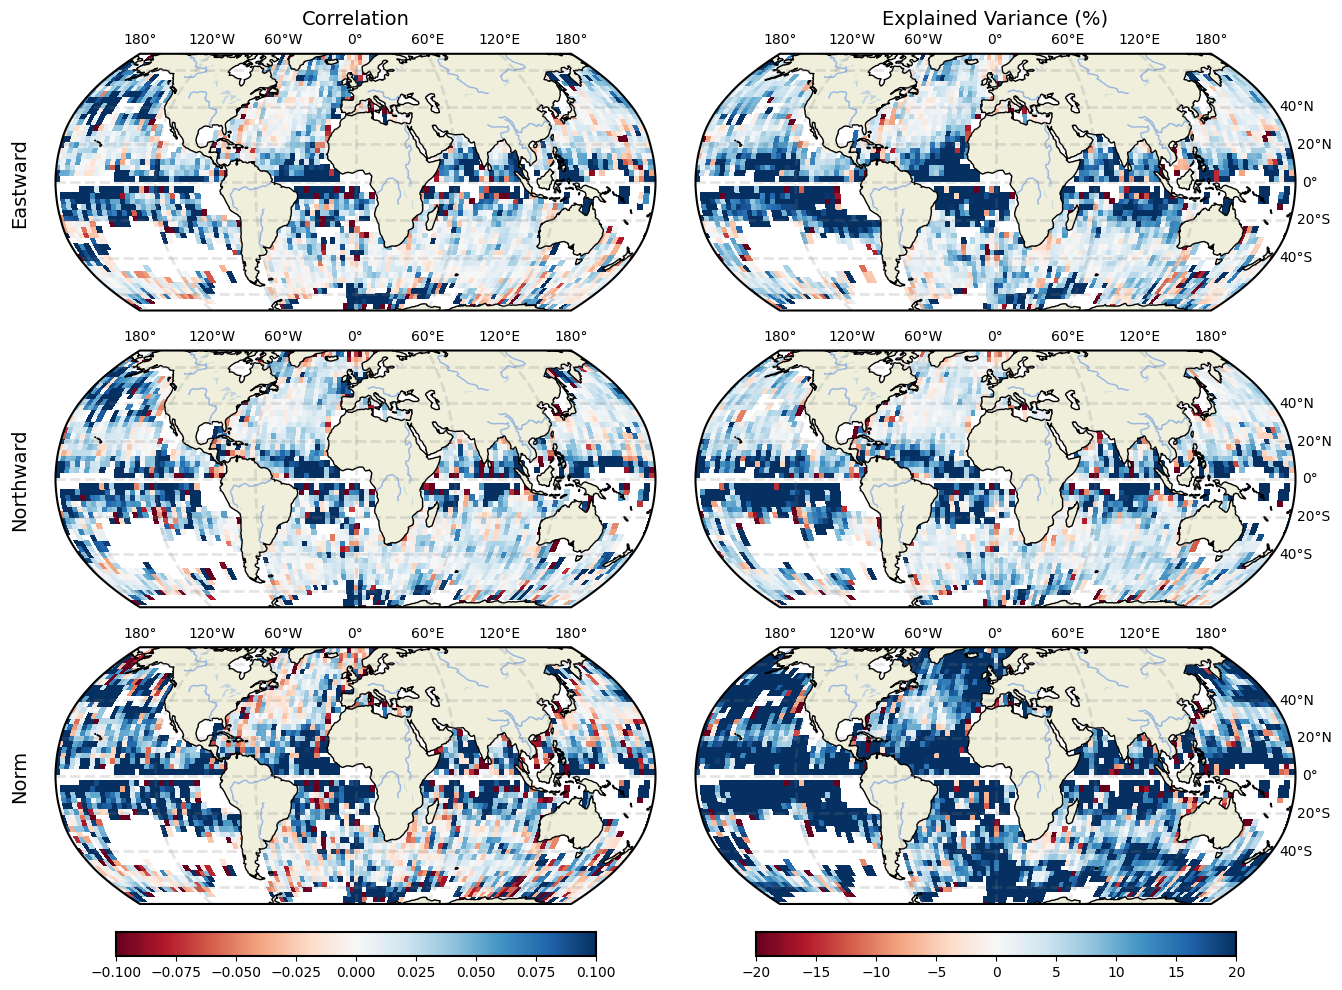

In [322]:
base_output="../../rec"
list_region=['Global']

depth = '15'
listvar = ('RMSD',  'Correlation', 'Explained Variance (%)', 'Quadratic Error (%)')

var = "Correlation"
list_var = ["Correlation","MSD Explained Variance (%)"]

for region in list_region:
     
     #ref = listdir[0]
     xp_name="neurost_sst_ssh_15m_10th" #
     ref = f"{base_output}/{xp_name}/metric/{region}/Eulerian_BINNED_{xp_name}.pyo"

     xp_name="unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost_RonanUnet" 
     to_eval = f"{base_output}/{xp_name}/metric/{region}/Eulerian_BINNED_{xp_name}.pyo"

     compare_map(list_var,ref,to_eval,box=[-180, 180, -70, 70])
     
plt.savefig('/Odyssey/private/t22picar/plot_article/figures/nosc-neurost_vs_neurost.png', dpi=300, bbox_inches='tight')

Diagnostic ['Correlation', 'MSD Explained Variance (%)']
ref : Eulerian_BINNED_unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet
to eval : Eulerian_BINNED_unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost_RonanUnet


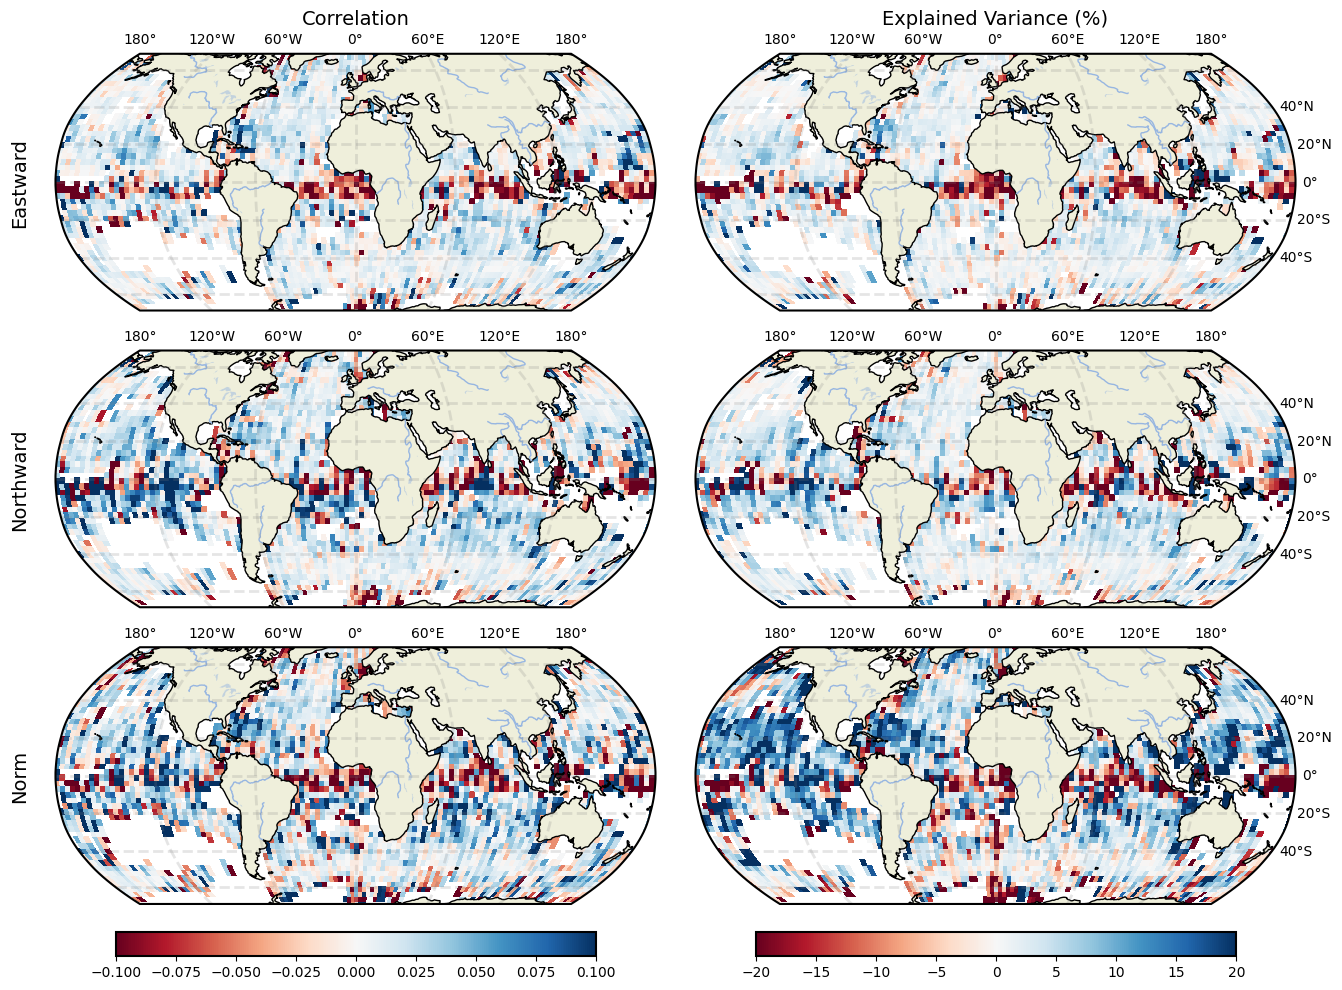

In [323]:
base_output="../../rec"
list_region=['Global']

depth = '15'
listvar = ('RMSD',  'Correlation', 'Explained Variance (%)', 'Quadratic Error (%)')

var = "Correlation"
list_var = ["Correlation","MSD Explained Variance (%)"]

for region in list_region:
     
     #ref = listdir[0]
     xp_name="unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet" #
     ref = f"{base_output}/{xp_name}/metric/{region}/Eulerian_BINNED_{xp_name}.pyo"

     xp_name="unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost_RonanUnet" 
     to_eval = f"{base_output}/{xp_name}/metric/{region}/Eulerian_BINNED_{xp_name}.pyo"

     compare_map(list_var,ref,to_eval,box=[-180, 180, -70, 70])
     
plt.savefig('/Odyssey/private/t22picar/plot_article/figures/nosc-neurost_vs_nosc-duacs.png', dpi=300, bbox_inches='tight')